In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head() # taking a look at the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df['MEDV'] = data.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

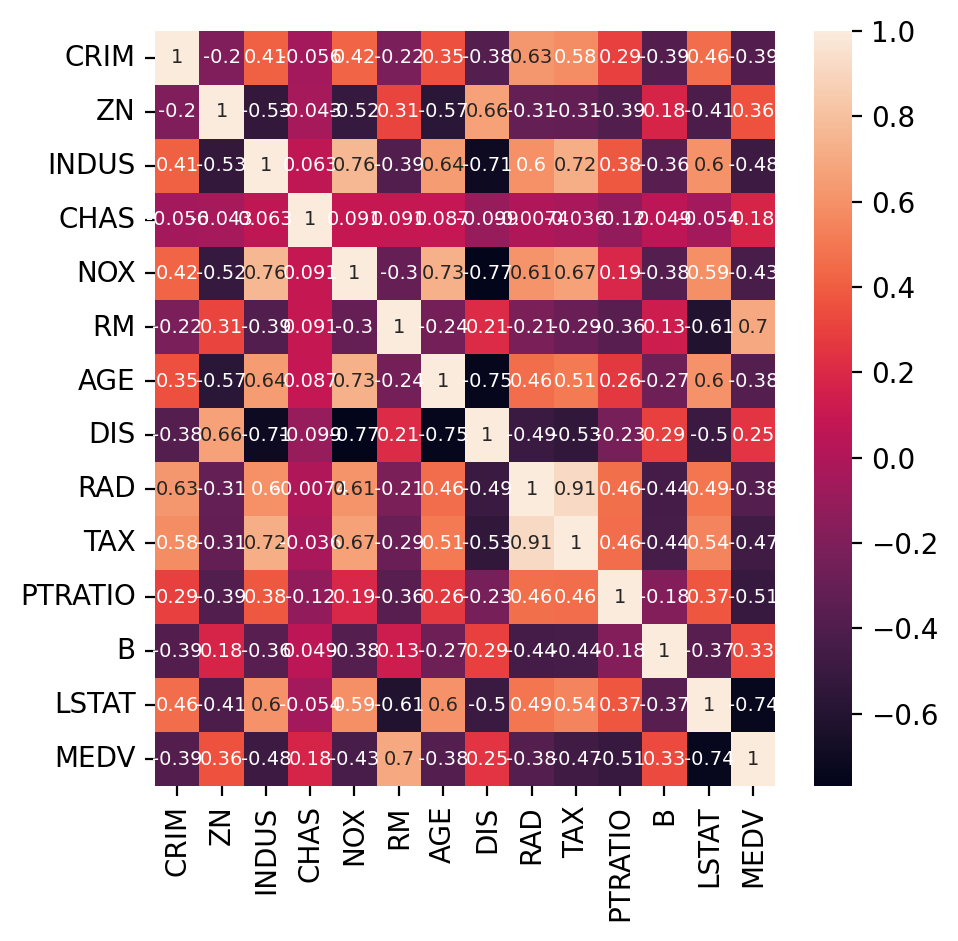

In [10]:
fig = plt.figure(figsize = (5,5), dpi = 200)
sns.heatmap(data = df.corr(), annot = True,annot_kws={"size": 7})

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

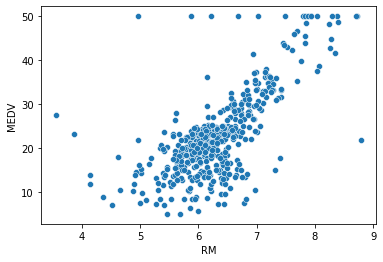

In [14]:
sns.scatterplot(data = df, x= 'RM', y = 'MEDV')#LINEAR

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

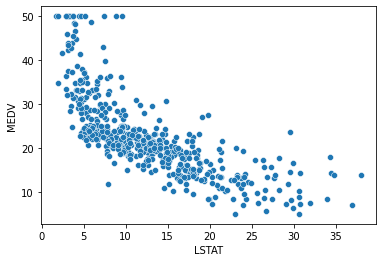

In [15]:
sns.scatterplot(data = df, x= 'LSTAT', y = 'MEDV')# nonlinear

In [17]:
X = df.drop(['MEDV','DIS','CHAS','B','ZN'],axis= 1)
y = df['MEDV']

# Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
train_rmse = []
test_rmse = []
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train,y_test = train_test_split(poly_features,y,test_size=.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

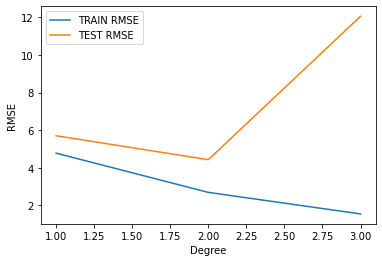

In [45]:
plt.plot(range(1,4),train_rmse[:3],label='TRAIN RMSE')
plt.plot(range(1,4),test_rmse[:3],label='TEST RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

In [50]:
test_rmse[1] #error w/ second degree polynomial

4.425577527147144

# Adaboost Regression

In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=101)

In [59]:
errors = []
for wm in range(1,100):#number of weak models
    model = AdaBoostRegressor(n_estimators=wm)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    errors.append(mean_squared_error(preds,y_test))

(15.0, 20.0)

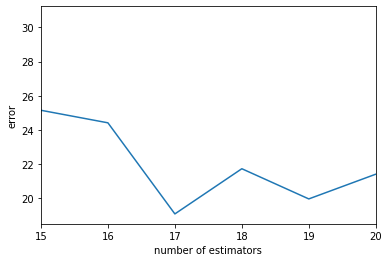

In [64]:
plt.plot(range(1,100),errors)
plt.xlabel('number of estimators')
plt.ylabel('error')
plt.xlim(15,20)#17 estimates

In [66]:
errors[17]#error with 17 estimators

21.719746112819465

# Linear Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [68]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=101)

In [70]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
preds = model.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_test, preds))

5.699177041416159

# SVM Regressor

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [83]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=101)

In [92]:
grid = GridSearchCV(estimator = SVR(),param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']},scoring='neg_mean_squared_error',verbose = 2)
pipe = make_pipeline(StandardScaler(),grid)

In [93]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .................................C=0.01, gamma=auto; total time=   0.0s
[CV] END .................................C=0.01, gamma=auto; total time=   0.0s
[CV] END .................................C=0.01, gamma=auto; total time=   0.0s
[CV] END .................................C=0.01, gamma=auto; total time=   0.0s
[CV] END .................................C=0.01, gamma=auto; total time=   0.0s
[CV] END ................................C=0.01, gamma=scale; total time=   0.0s
[CV] END ................................C=0.01, gamma=scale; total time=   0.0s
[CV] END ................................C=0.01, gamma=scale; total time=   0.0s
[CV] END ................................C=0.01, gamma=scale; total time=   0.0s
[CV] END ................................C=0.01, gamma=scale; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1

In [94]:
grid.best_estimator_

SVR(C=100, gamma='auto')

In [96]:
rmse#best model

3.5166763411589255

# final model + deploying

In [97]:
final_model= SVR(C=100, gamma='auto')
final_model.fit(X,y)

SVR(C=100, gamma='auto')

In [98]:
import joblib

In [100]:
joblib.dump(final_model,'final_boston_model.pkl')
joblib.dump(list(X.columns),'boston_column_names.pkl')

['boston_column_names.pkl']

# Loading Model

In [104]:
col_names = joblib.load('boston_column_names.pkl')
col_names

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [105]:
loaded_model = joblib.load('final_boston_model.pkl')